In [2]:
import pandas as pd
import math
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch
from utils import plot_sliding_windows
sns.set(style="whitegrid")

In [36]:
from preprocess import PreprocessingPipeline

pipeline = PreprocessingPipeline(
    directory='./',
    scaler='MinMaxScaler',
    workload_column='game_workload_scaled'
)
pipeline.run()


Loading datasets...
injuries: 137 rows, 2 columns, missing entries: 0
injuries: Data on 29 athletes
game_workload: 2400 rows, 3 columns, missing entries: 0
game_workload: Data on 30 athletes
metrics: 43800 rows, 4 columns, missing entries: 0
metrics: Data on 30 athletes
Validating datasets...
Preparing data...
Adding previous injury feature...
Scaling features per athlete...
# of missing data points: game_workload    19500
groin_squeeze        0
hip_mobility         0
dtype: int64, Imputing missing 
Calculating ACWR per athlete...
Data processing completed. Dataset saved as 'data_acwr.csv'.


In [37]:
df = pipeline.final_df

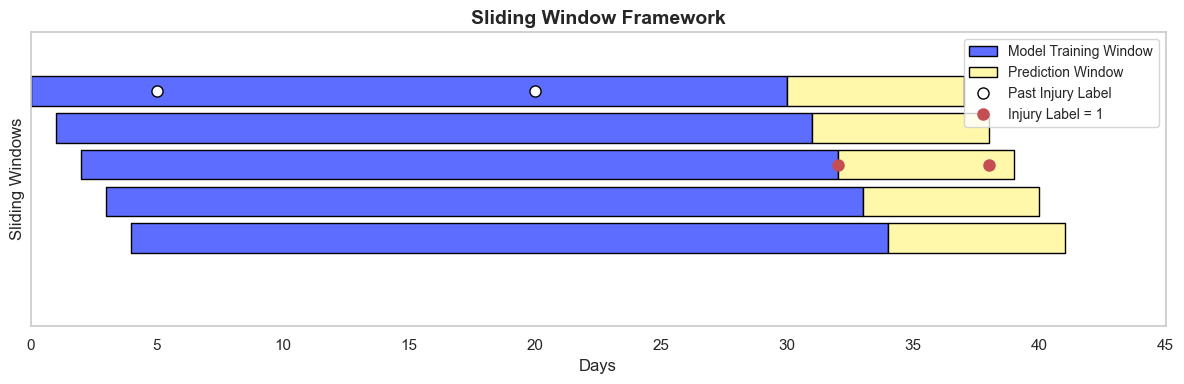

In [38]:

plot_sliding_windows(
    history_window=30,
    future_window=7,
    total_days=45,
    past_injury_days=[5, 20],
    future_injury_days=[32, 38],
    num_windows=5
)


## XGBOOST

In [12]:
from xgboost_pipeline import InjuryXGBoostModel

In [21]:
#scale global features [this can be improved]

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

features = ['groin_squeeze', 'hip_mobility', 'game_workload', 'acute_workload',
        'chronic_workload', 
        'acute_chronic_ratio']

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

Loading Model...
Model initialized.

Processing Data with Sliding Windows...
Sliding Window Data Shape: (20820, 30, 7)
Labels Shape: (20820,)
Splitting Data into Training and Test Sets...
Performing Cross-Validation...
Cross-Validation Results:
    train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0         0.740906   4.623840e-03       0.730730      0.004615
1         0.821761   7.293495e-03       0.806943      0.006822
2         0.869097   6.673153e-03       0.853035      0.002259
3         0.901343   6.990461e-03       0.882177      0.003709
4         0.922119   3.175795e-03       0.902636      0.002934
..             ...            ...            ...           ...
95        1.000000   2.443315e-09       0.999803      0.000069
96        1.000000   2.443315e-09       0.999804      0.000071
97        1.000000   2.443315e-09       0.999809      0.000070
98        1.000000   2.443315e-09       0.999812      0.000063
99        1.000000   0.000000e+00       0.999812      0.000065

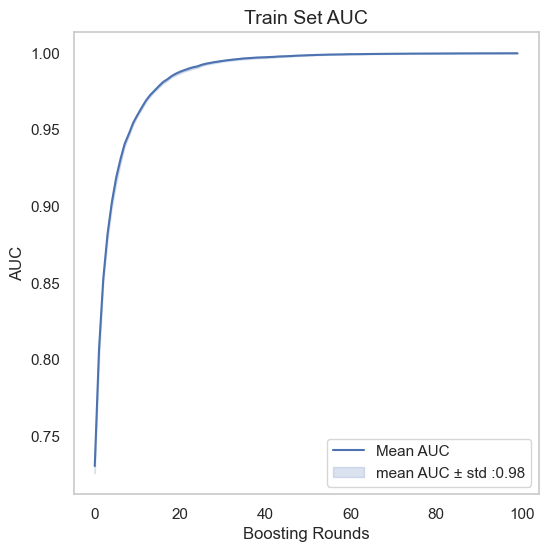

Training the Model...
Evaluating Model on Hold-Out Test Set...
Precision: 0.25, Recall: 0.27, F1: 0.26, AUC: 0.80


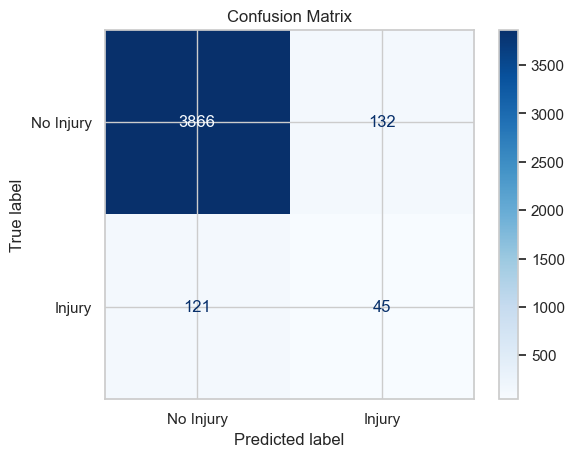

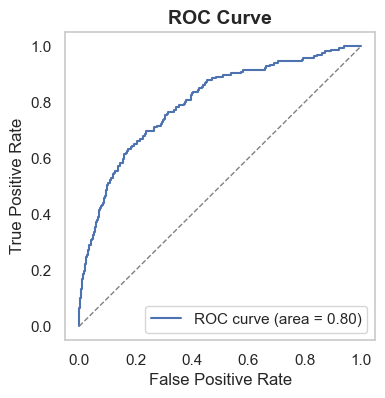

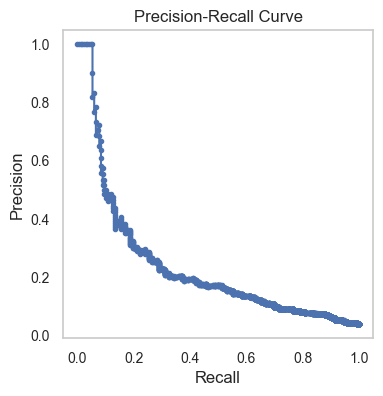

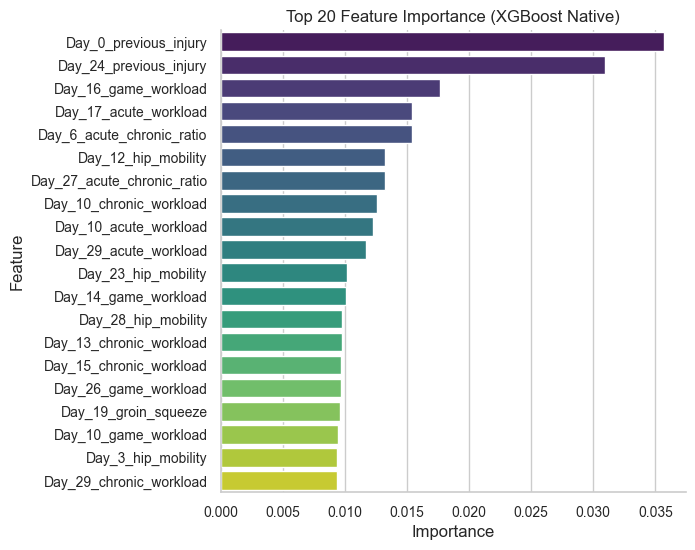

Performing SHAP Analysis...


100%|===================| 20760/20820 [01:07<00:00]        

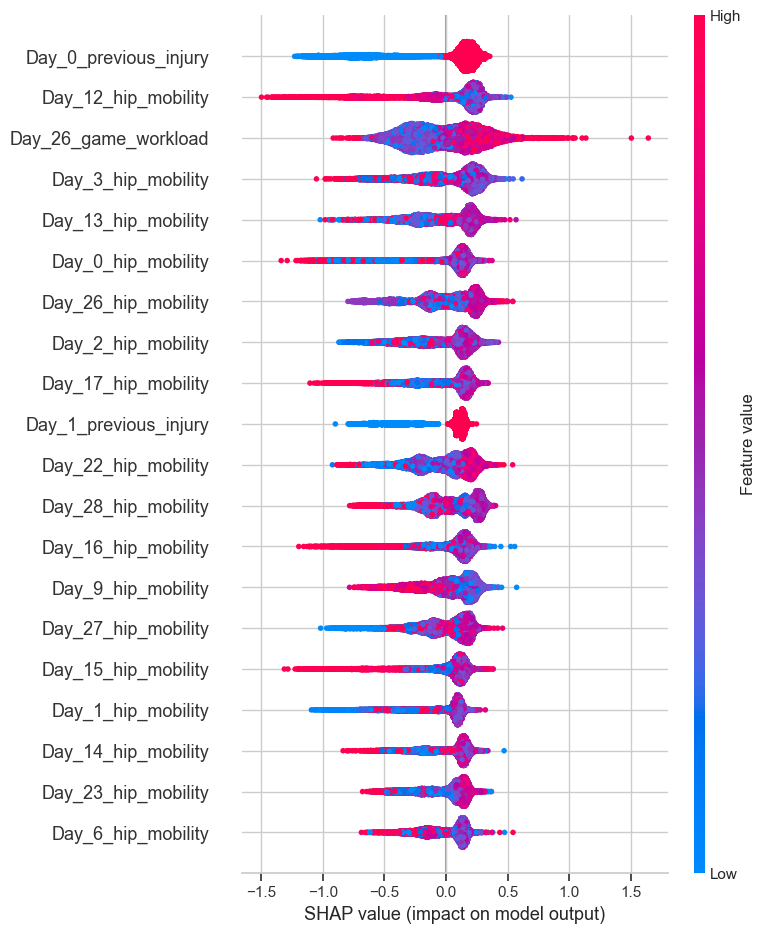

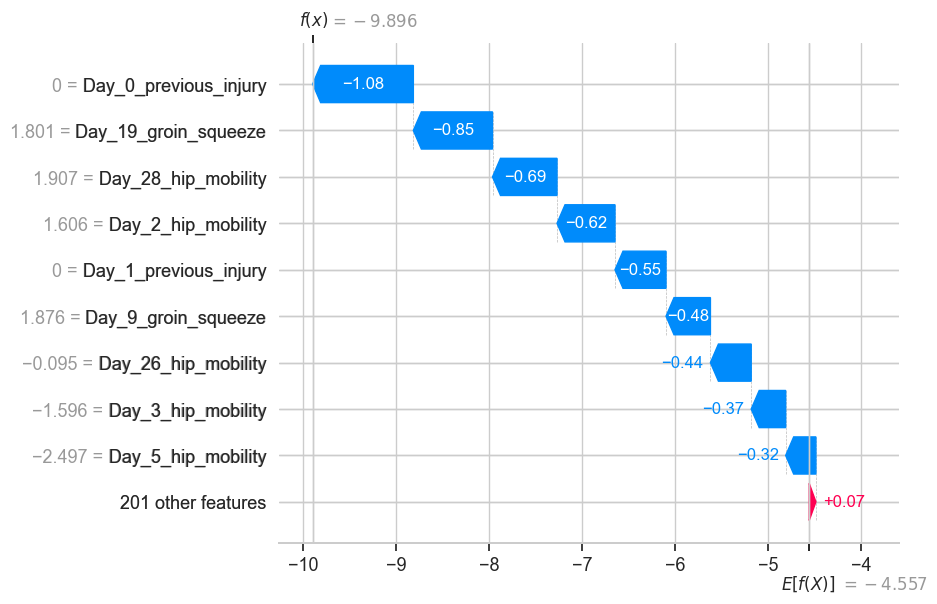

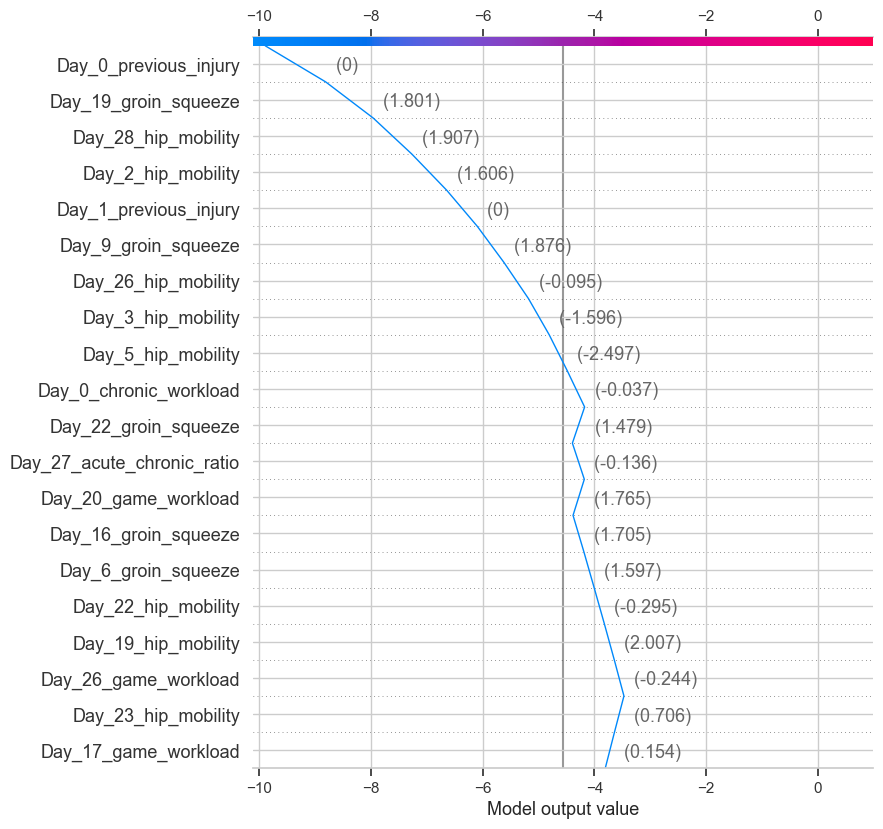

In [23]:
CONFIG = {
    'FEATURES': [
        'groin_squeeze', 
        'hip_mobility',
        'game_workload', 
        'acute_workload',
        'chronic_workload', 
        'acute_chronic_ratio',
        'previous_injury'
    ],
    'TARGET': 'injured',
    'TEST_SIZE': 0.2,
    'RANDOM_STATE': 42,
    'HISTORY_WINDOW': 30,
    'FUTURE_WINDOW': 7,
    'CV_SPLITS': 5
}

model = InjuryXGBoostModel(df, CONFIG)
model.process_data()
model.train_and_evaluate()
model.shap_analysis()


## CNN-Model by Athlete

In [39]:
from mts_cnn_pipeline import AthleteCNNModel

In [25]:
#use individually scaled features

In [40]:
CONFIG = {
    'FEATURES': [
        'game_workload_scaled',
        'groin_squeeze_scaled', 
        'hip_mobility_scaled', 
        'acute_workload',
        'chronic_workload', 
        'acute_chronic_ratio',
        'previous_injury'
    ],
    'TARGET': 'injured',
    'HISTORY_WINDOW': 30,
    'FUTURE_WINDOW': 7,
    'EPOCHS': 10,
    'BATCH_SIZE': 32,
    'RANDOM_STATE': 42,
    'WINDOW_STEP': 7
}


Sliding Window Data Shape: (100, 30, 7)
Labels Shape: (100,)
Sliding Window Data Shape: (100, 30, 7)
Labels Shape: (100,)
Sliding Window Data Shape: (100, 30, 7)
Labels Shape: (100,)
Sliding Window Data Shape: (100, 30, 7)
Labels Shape: (100,)
Sliding Window Data Shape: (100, 30, 7)
Labels Shape: (100,)
Sliding Window Data Shape: (100, 30, 7)
Labels Shape: (100,)
Sliding Window Data Shape: (100, 30, 7)
Labels Shape: (100,)
Sliding Window Data Shape: (100, 30, 7)
Labels Shape: (100,)
Sliding Window Data Shape: (100, 30, 7)
Labels Shape: (100,)
Sliding Window Data Shape: (100, 30, 7)
Labels Shape: (100,)
Sliding Window Data Shape: (100, 30, 7)
Labels Shape: (100,)
Sliding Window Data Shape: (100, 30, 7)
Labels Shape: (100,)
Skipping Athlete 13: No injury records found.
Sliding Window Data Shape: (100, 30, 7)
Labels Shape: (100,)
Sliding Window Data Shape: (100, 30, 7)
Labels Shape: (100,)
Sliding Window Data Shape: (100, 30, 7)
Labels Shape: (100,)
Sliding Window Data Shape: (100, 30, 7)

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 976us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 985us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 985us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


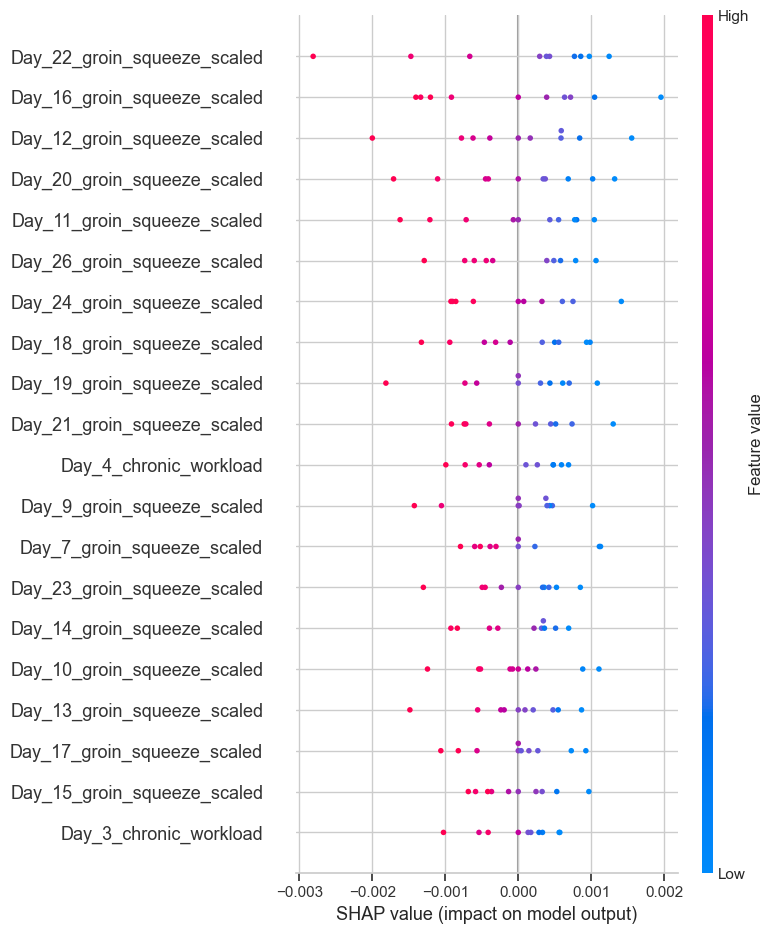

Most Important Feature: Day_22_groin_squeeze_scaled (Importance: 0.0010)
🚀 Training model for Athlete 2...
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.3006 - accuracy: 0.5118 - loss: 1.1284
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.5942 - accuracy: 0.5954 - loss: 0.7242 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8566 - accuracy: 0.7971 - loss: 0.5426 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9245 - accuracy: 0.8732 - loss: 0.4367 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9516 - accuracy: 0.8559 - loss: 0.3972 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9713 - accuracy: 0.9146 - loss: 0.3307 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9644 - accuracy: 0.8741 - loss: 0.3305 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9777 - accuracy: 0.9120 - loss: 0.2775 
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9894 - accuracy: 0.9360 - loss: 0.2229 
Epoch 10/10
5/5 ━━━━━

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 985us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 980us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step


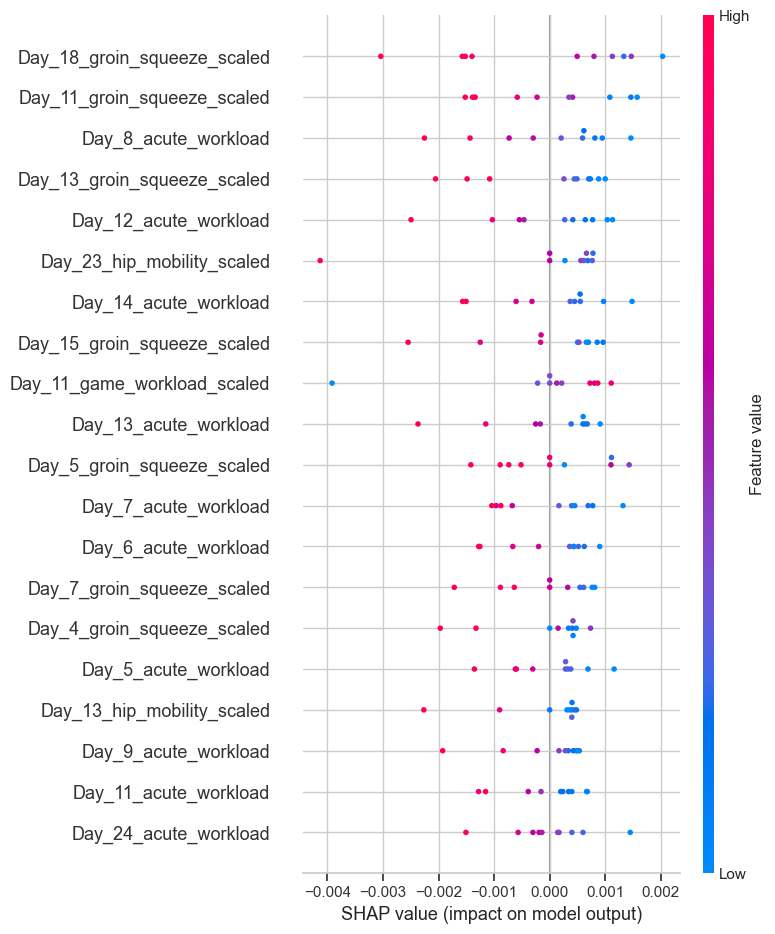

Most Important Feature: Day_18_groin_squeeze_scaled (Importance: 0.0015)
🚀 Training model for Athlete 3...
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.4506 - accuracy: 0.5072 - loss: 0.8023
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.6888 - accuracy: 0.5937 - loss: 0.6194 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7711 - accuracy: 0.6983 - loss: 0.5688 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8200 - accuracy: 0.7362 - loss: 0.5242 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8844 - accuracy: 0.7888 - loss: 0.4582 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8665 - accuracy: 0.7901 - loss: 0.4703
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9162 - accuracy: 0.7795 - loss: 0.4002 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9293 - accuracy: 0.8672 - loss: 0.3833
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9112 - accuracy: 0.8401 - loss: 0.3896 
Epoch 10/10
5/5 ━━━━━━━

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 979us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 985us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


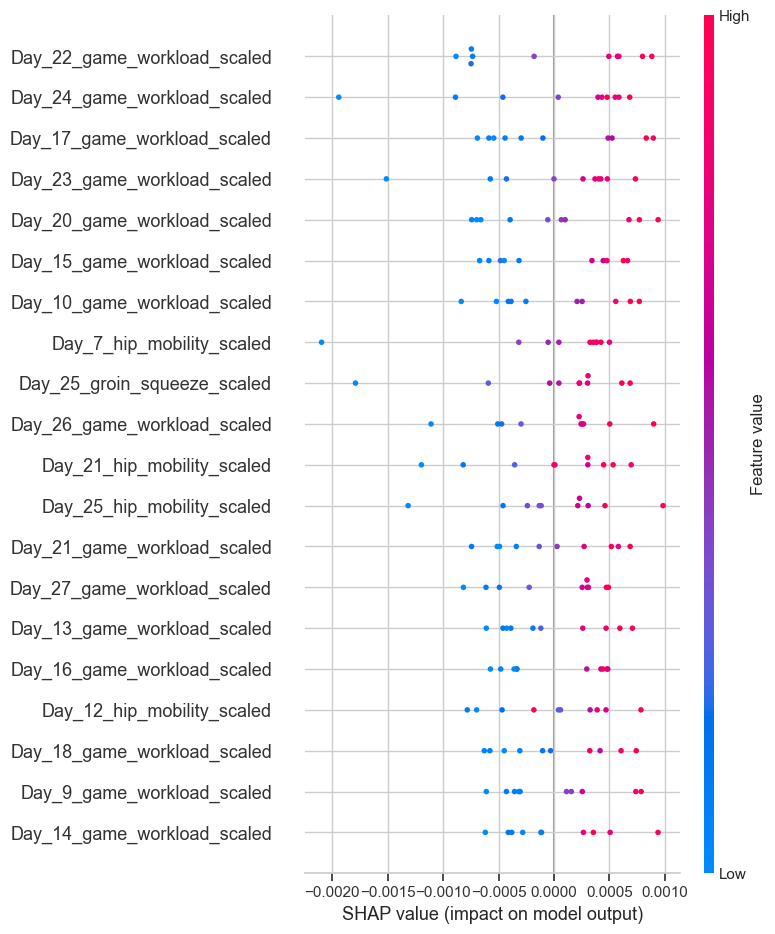

Most Important Feature: Day_22_game_workload_scaled (Importance: 0.0007)
🚀 Training model for Athlete 4...
ADASYN failed for Athlete 4, falling back to RandomOverSampler: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 5, n_samples = 5
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.5886 - accuracy: 0.5591 - loss: 0.7072
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8616 - accuracy: 0.7671 - loss: 0.4811 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8690 - accuracy: 0.8393 - loss: 0.4296 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9525 - accuracy: 0.8545 - loss: 0.3040
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9267 - accuracy: 0.8366 - loss: 0.3528 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9492 - accuracy: 0.9164 - loss: 0.3026 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9754 - accuracy: 0.9324 - loss: 0.2311 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.96

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


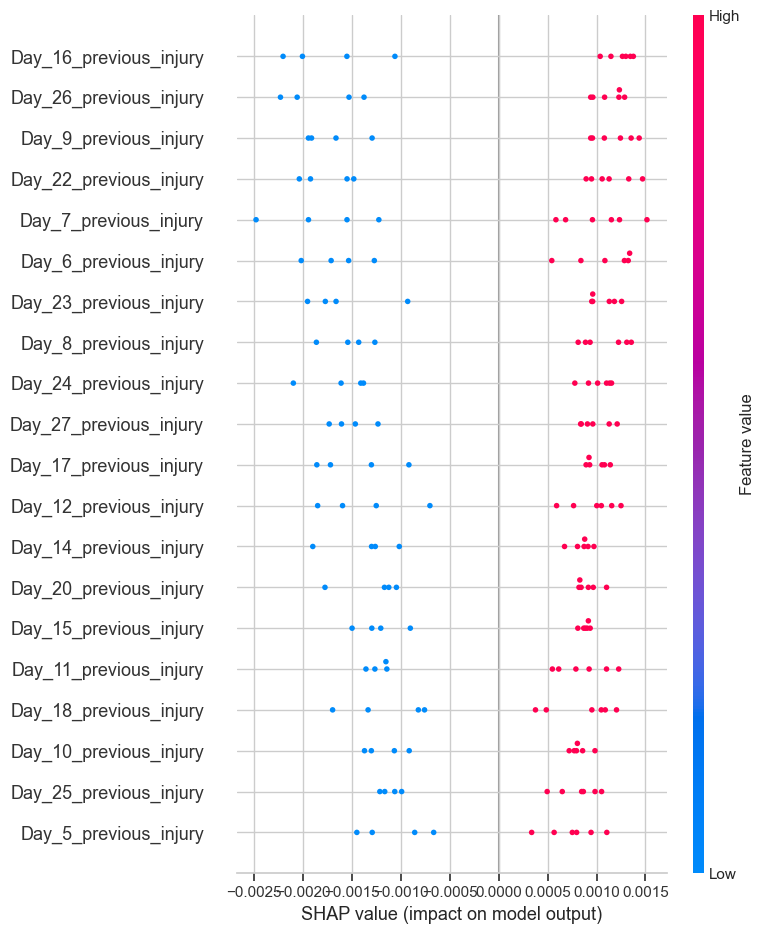

Most Important Feature: Day_16_previous_injury (Importance: 0.0014)
🚀 Training model for Athlete 5...
Skipping Athlete 5: Not enough samples for stratified splitting.
🚀 Training model for Athlete 6...
ADASYN failed for Athlete 6, falling back to RandomOverSampler: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 2, n_samples = 2
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6620 - accuracy: 0.6279 - loss: 0.6569
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9245 - accuracy: 0.8574 - loss: 0.3885 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9577 - accuracy: 0.9115 - loss: 0.3036 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9739 - accuracy: 0.9227 - loss: 0.2501 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9589 - accuracy: 0.9418 - loss: 0.2195 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9806 - accuracy: 0.9318 - loss: 0.1872 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9656

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


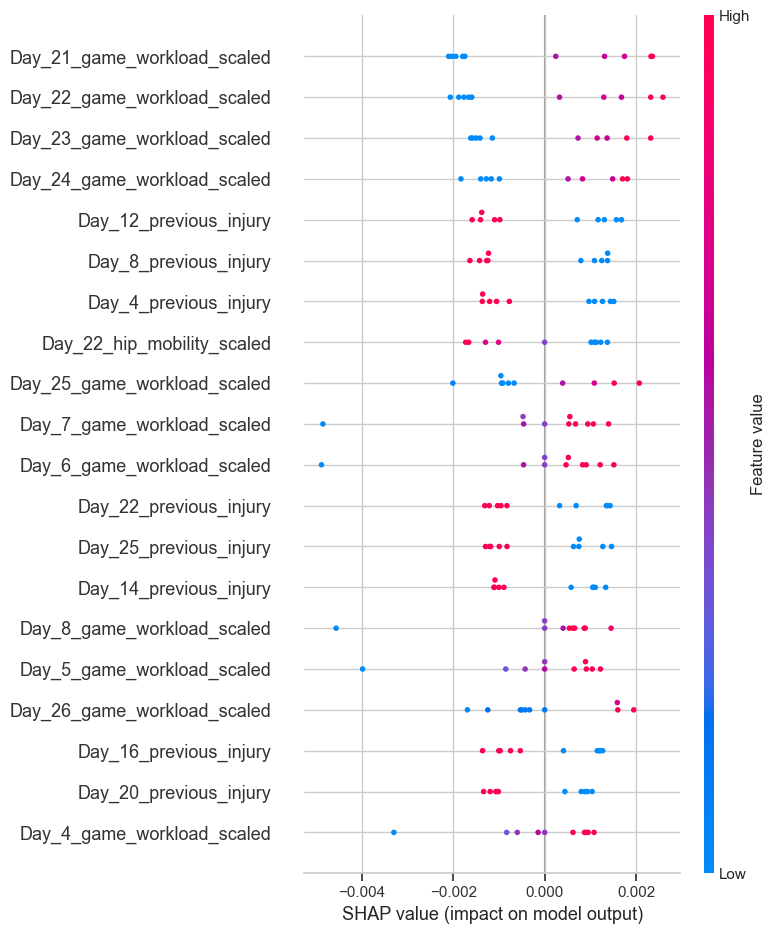

Most Important Feature: Day_21_game_workload_scaled (Importance: 0.0018)
🚀 Training model for Athlete 7...
ADASYN failed for Athlete 7, falling back to RandomOverSampler: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 3, n_samples = 3
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6534 - accuracy: 0.6787 - loss: 0.6841
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9393 - accuracy: 0.8988 - loss: 0.3966 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9597 - accuracy: 0.9416 - loss: 0.2676 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9784 - accuracy: 0.9499 - loss: 0.2188 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9464 - accuracy: 0.8935 - loss: 0.2750 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9803 - accuracy: 0.9537 - loss: 0.2002
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9940 - accuracy: 0.9402 - loss: 0.1767 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.98

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 980us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
754/754 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step


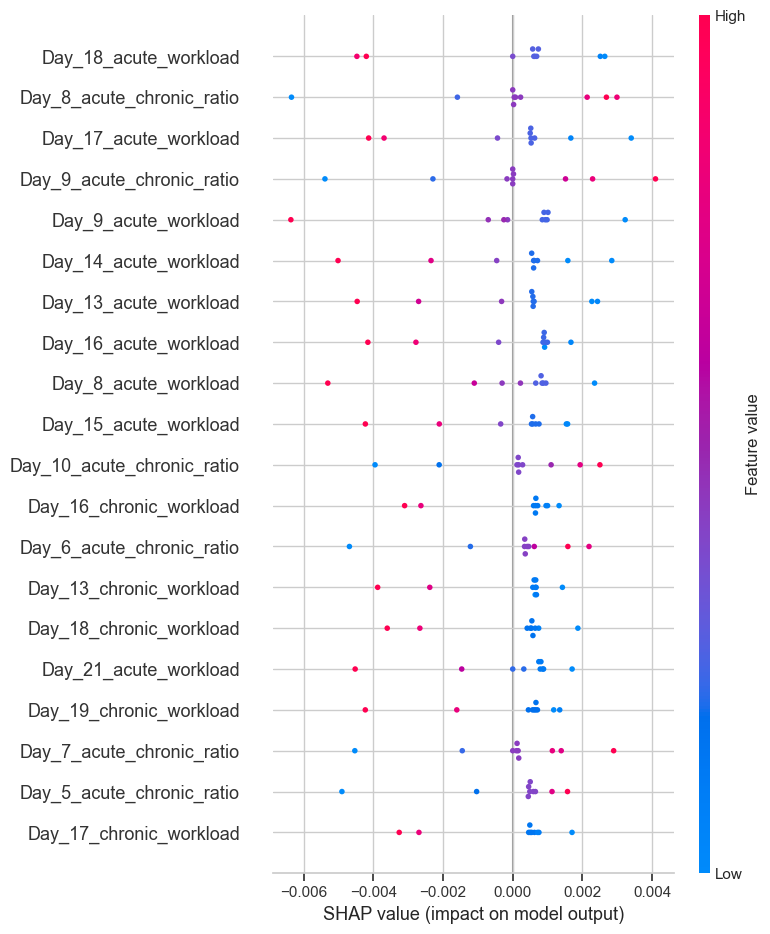

Most Important Feature: Day_18_acute_workload (Importance: 0.0017)
🚀 Training model for Athlete 8...
ADASYN failed for Athlete 8, falling back to RandomOverSampler: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 2, n_samples = 2
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7780 - accuracy: 0.6275 - loss: 0.6298
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9098 - accuracy: 0.8640 - loss: 0.4495 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9505 - accuracy: 0.8930 - loss: 0.3374 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9565 - accuracy: 0.9339 - loss: 0.3106 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9872 - accuracy: 0.9568 - loss: 0.2236 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9832 - accuracy: 0.9556 - loss: 0.2264 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9943 - accuracy: 0.9226 - loss: 0.1875 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9952 - 

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1000us/step


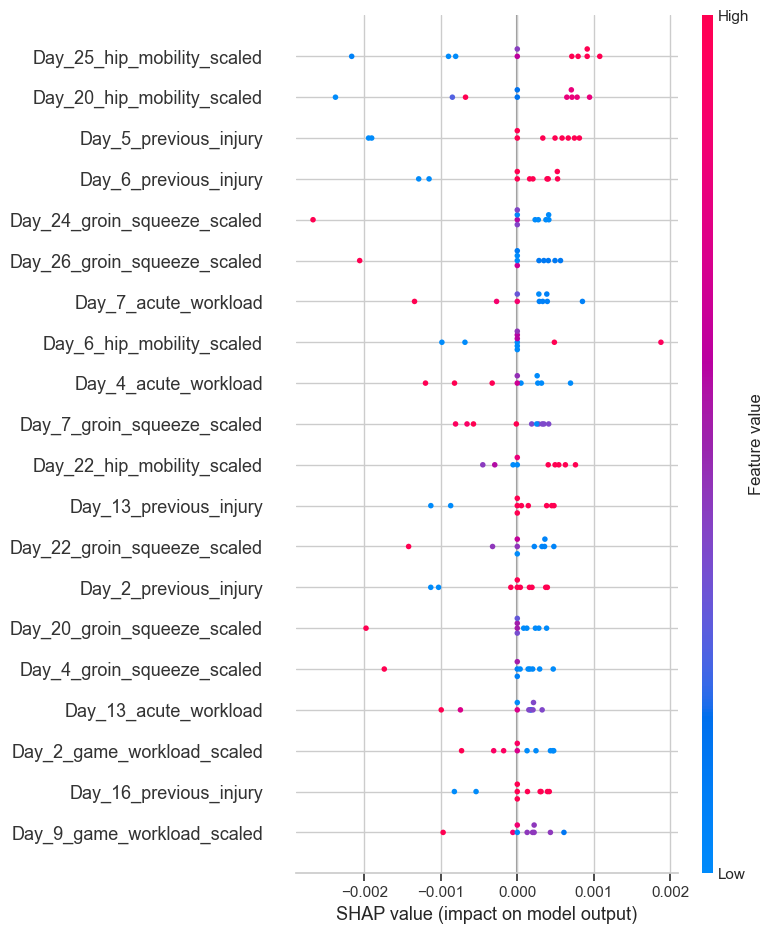

Most Important Feature: Day_25_hip_mobility_scaled (Importance: 0.0008)
🚀 Training model for Athlete 9...
Skipping Athlete 9: Not enough samples for stratified splitting.
🚀 Training model for Athlete 10...
ADASYN failed for Athlete 10, falling back to RandomOverSampler: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 4, n_samples = 4
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.5897 - accuracy: 0.5476 - loss: 0.7833
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6709 - accuracy: 0.5793 - loss: 0.6637 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8026 - accuracy: 0.6910 - loss: 0.5811 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8502 - accuracy: 0.7423 - loss: 0.5271 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9121 - accuracy: 0.8192 - loss: 0.4463 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9004 - accuracy: 0.8548 - loss: 0.4208
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 987us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1000us/step


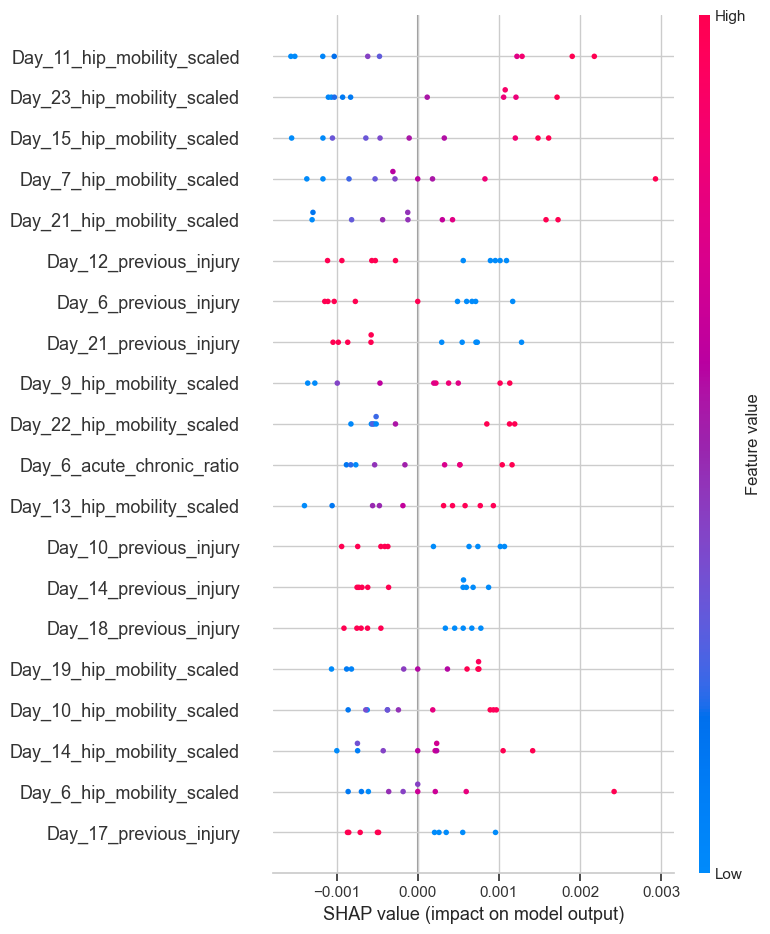

Most Important Feature: Day_11_hip_mobility_scaled (Importance: 0.0013)
🚀 Training model for Athlete 11...
ADASYN failed for Athlete 11, falling back to RandomOverSampler: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 3, n_samples = 3
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6375 - accuracy: 0.6161 - loss: 0.7150
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9295 - accuracy: 0.8858 - loss: 0.3681 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9334 - accuracy: 0.8116 - loss: 0.3528 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9642 - accuracy: 0.8675 - loss: 0.2823 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9662 - accuracy: 0.9391 - loss: 0.2273 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9898 - accuracy: 0.9313 - loss: 0.1681 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9825 - accuracy: 0.8940 - loss: 0.2053 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step


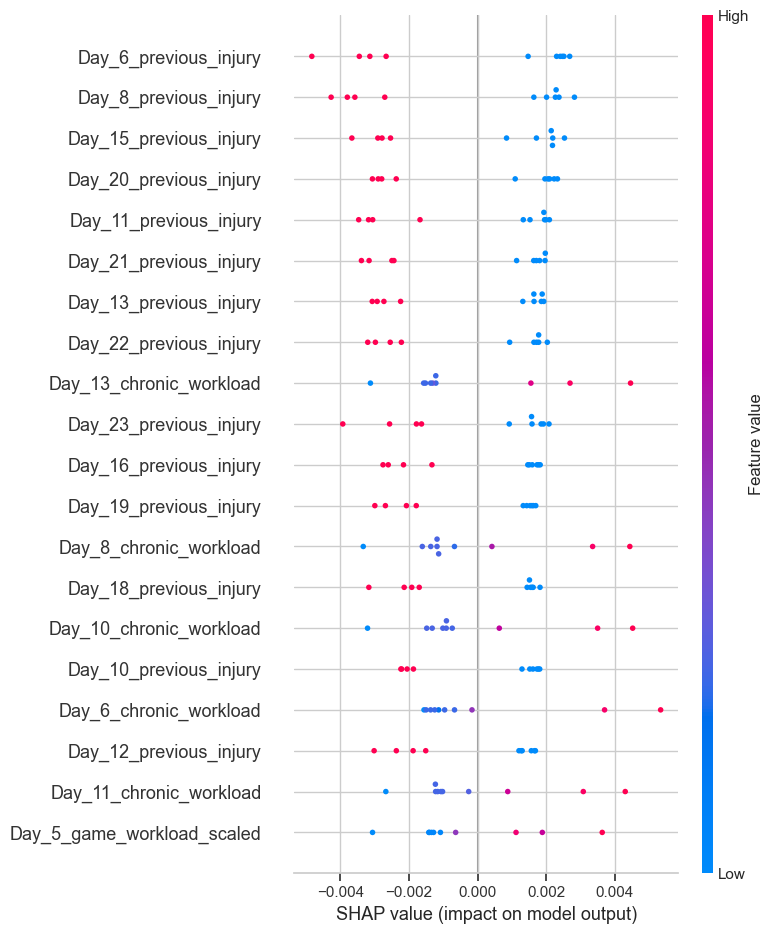

Most Important Feature: Day_6_previous_injury (Importance: 0.0028)
🚀 Training model for Athlete 12...
ADASYN failed for Athlete 12, falling back to RandomOverSampler: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 5, n_samples = 5
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.4058 - accuracy: 0.4808 - loss: 0.9575
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.5604 - accuracy: 0.5209 - loss: 0.7159 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.5990 - accuracy: 0.5754 - loss: 0.7123
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7512 - accuracy: 0.6818 - loss: 0.5958 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7894 - accuracy: 0.7088 - loss: 0.5869 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8435 - accuracy: 0.7574 - loss: 0.5360 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8828 - accuracy: 0.8201 - loss: 0.4807 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9106 -

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 994us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 992us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1000us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


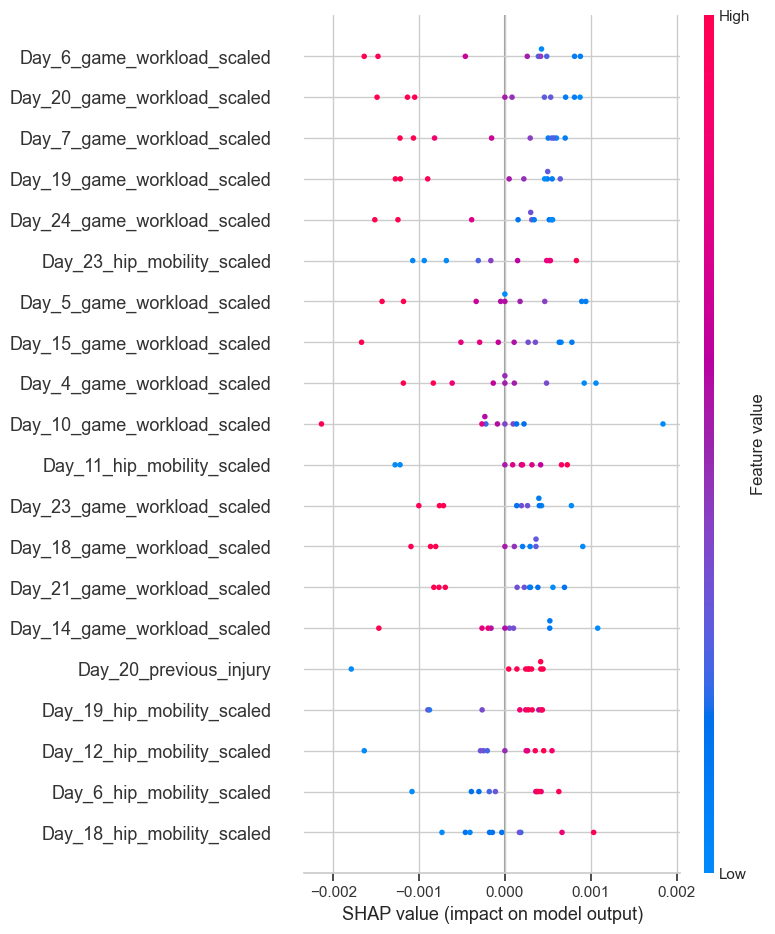

Most Important Feature: Day_6_game_workload_scaled (Importance: 0.0007)
🚀 Training model for Athlete 14...
ADASYN failed for Athlete 14, falling back to RandomOverSampler: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 3, n_samples = 3
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.6045 - accuracy: 0.5623 - loss: 0.7262
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8755 - accuracy: 0.8027 - loss: 0.4501 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8871 - accuracy: 0.8070 - loss: 0.3961 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9257 - accuracy: 0.8329 - loss: 0.3405 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9581 - accuracy: 0.8962 - loss: 0.3129
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9346 - accuracy: 0.9053 - loss: 0.3199 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9630 - accuracy: 0.9100 - loss: 0.2511 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step


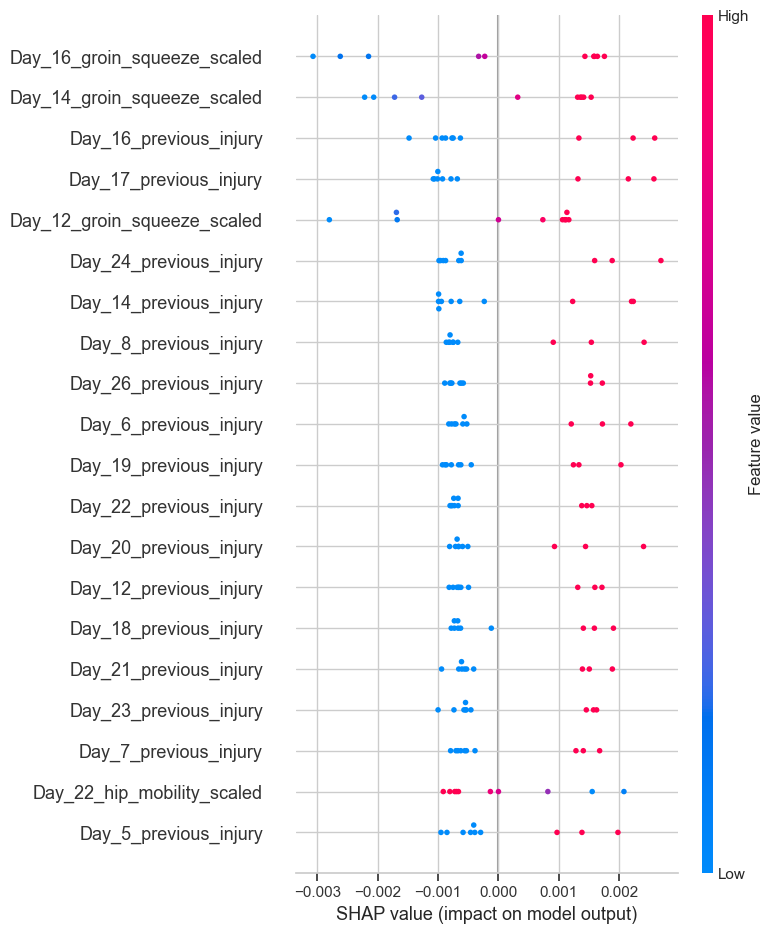

Most Important Feature: Day_16_groin_squeeze_scaled (Importance: 0.0016)
🚀 Training model for Athlete 15...
ADASYN failed for Athlete 15, falling back to RandomOverSampler: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 3, n_samples = 3
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.3683 - accuracy: 0.4174 - loss: 0.9086
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7457 - accuracy: 0.7248 - loss: 0.6157 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8425 - accuracy: 0.7702 - loss: 0.4905 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9271 - accuracy: 0.8927 - loss: 0.3821 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9573 - accuracy: 0.9251 - loss: 0.3339 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9757 - accuracy: 0.9178 - loss: 0.3106 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9611 - accuracy: 0.9472 - loss: 0.2736 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 994us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step


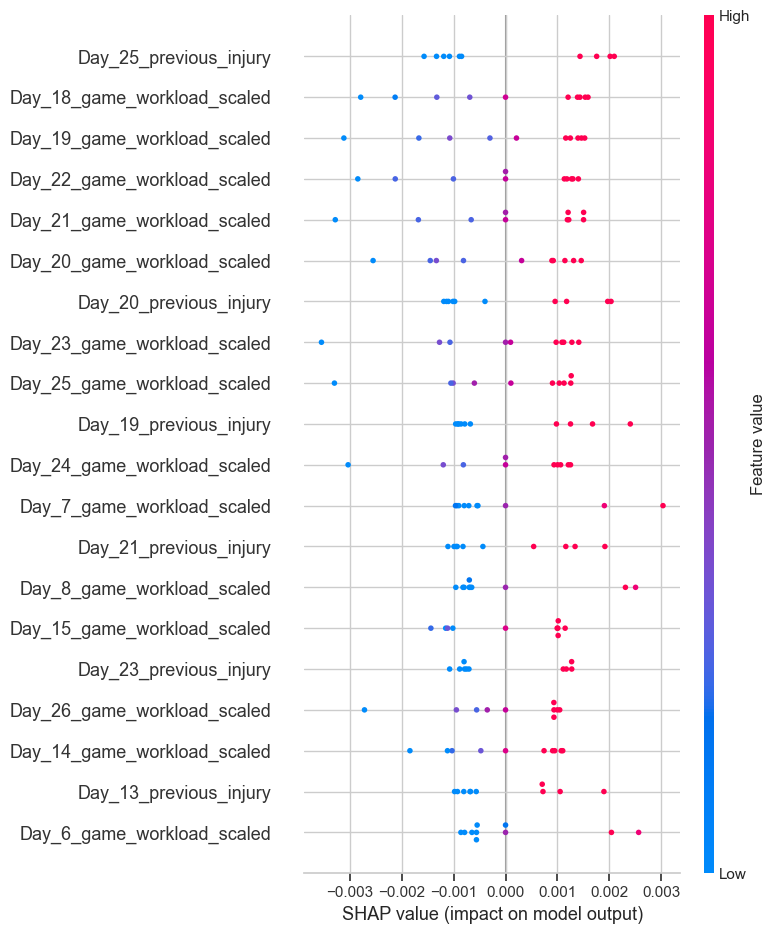

Most Important Feature: Day_25_previous_injury (Importance: 0.0014)
🚀 Training model for Athlete 16...
Skipping Athlete 16: Not enough samples for stratified splitting.
🚀 Training model for Athlete 17...
ADASYN failed for Athlete 17, falling back to RandomOverSampler: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 3, n_samples = 3
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - AUC: 0.7908 - accuracy: 0.7290 - loss: 0.5764
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9744 - accuracy: 0.9047 - loss: 0.2891 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9761 - accuracy: 0.9260 - loss: 0.2543 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9857 - accuracy: 0.9646 - loss: 0.1780 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9852 - accuracy: 0.9641 - loss: 0.1644 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9872 - accuracy: 0.9706 - loss: 0.1542 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 938us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 976us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step


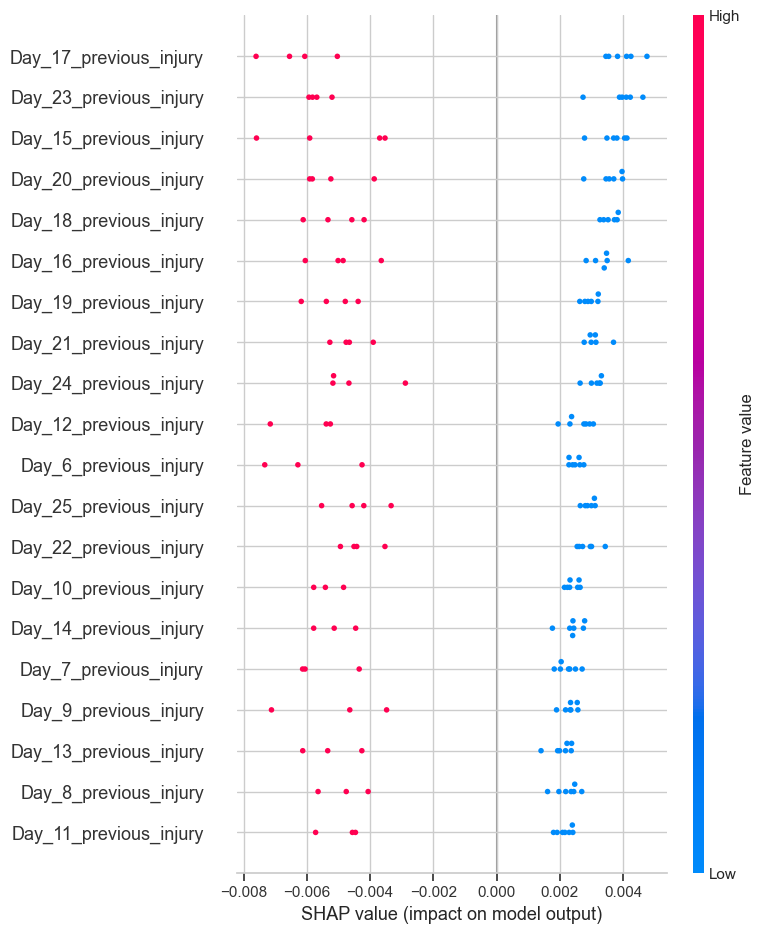

Most Important Feature: Day_17_previous_injury (Importance: 0.0049)
🚀 Training model for Athlete 18...
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6122 - accuracy: 0.6103 - loss: 0.6837
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7660 - accuracy: 0.6948 - loss: 0.5836 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8492 - accuracy: 0.7455 - loss: 0.5121 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8730 - accuracy: 0.7940 - loss: 0.4673 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9589 - accuracy: 0.8827 - loss: 0.3629 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9646 - accuracy: 0.8592 - loss: 0.3436 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9618 - accuracy: 0.8694 - loss: 0.3207 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9741 - accuracy: 0.8858 - loss: 0.2758 
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9810 - accuracy: 0.8950 - loss: 0.2293 
Epoch 10/10
5/5 ━━━━━━━━━

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 963us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step


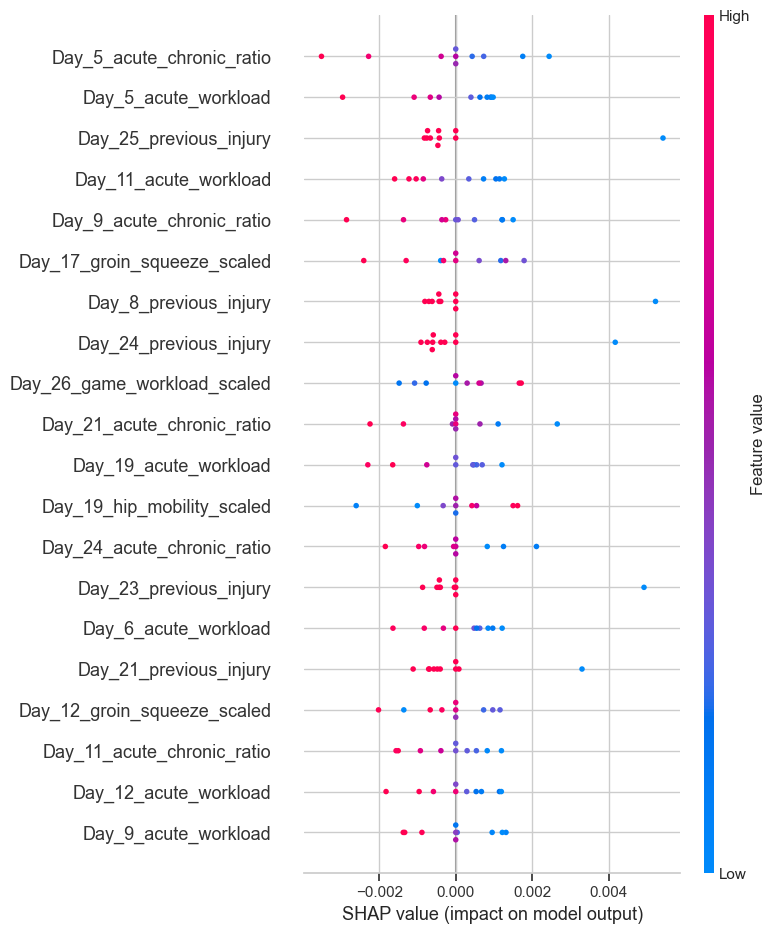

Most Important Feature: Day_5_acute_chronic_ratio (Importance: 0.0012)
🚀 Training model for Athlete 19...
ADASYN failed for Athlete 19, falling back to RandomOverSampler: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 2, n_samples = 2
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.7341 - accuracy: 0.6693 - loss: 0.5945
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9121 - accuracy: 0.8743 - loss: 0.4144 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9559 - accuracy: 0.8864 - loss: 0.3097 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9619 - accuracy: 0.9162 - loss: 0.2351 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9619 - accuracy: 0.9006 - loss: 0.2586 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9661 - accuracy: 0.9214 - loss: 0.2303 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9638 - accuracy: 0.9399 - loss: 0.2113 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 959us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 968us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 996us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 983us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step


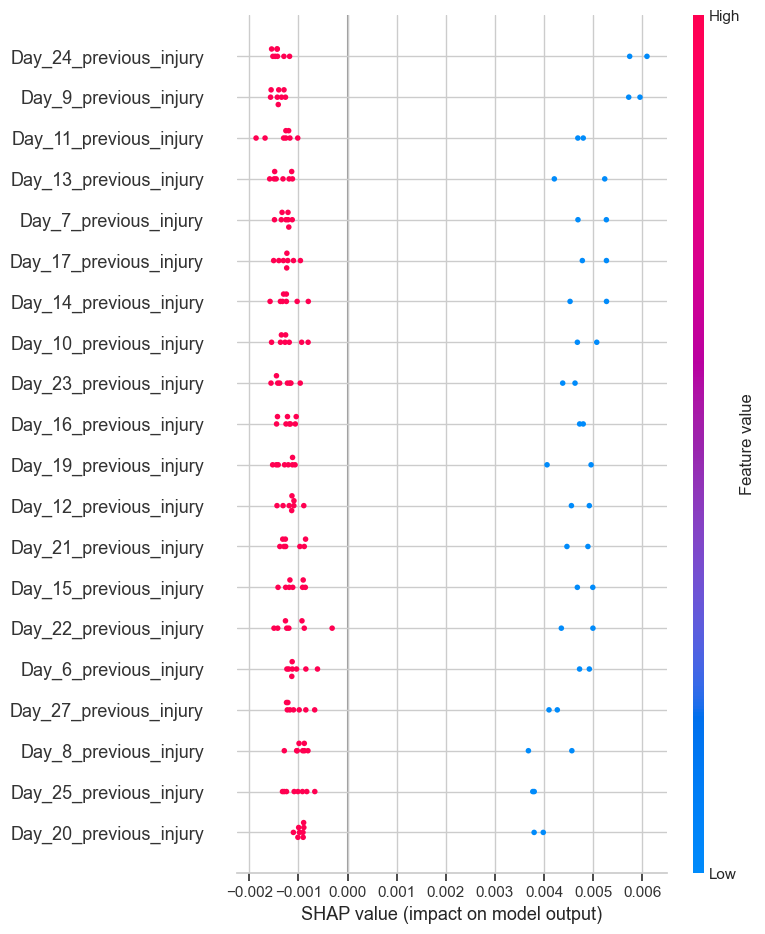

Most Important Feature: Day_24_previous_injury (Importance: 0.0023)
🚀 Training model for Athlete 20...
ADASYN failed for Athlete 20, falling back to RandomOverSampler: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 5, n_samples = 5
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6581 - accuracy: 0.6372 - loss: 0.7986
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7566 - accuracy: 0.6699 - loss: 0.6488
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8143 - accuracy: 0.7016 - loss: 0.5410
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8677 - accuracy: 0.7765 - loss: 0.4941 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8699 - accuracy: 0.7562 - loss: 0.4695
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8877 - accuracy: 0.7950 - loss: 0.4621 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9205 - accuracy: 0.8371 - loss: 0.4019 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9217 - 

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 953us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step


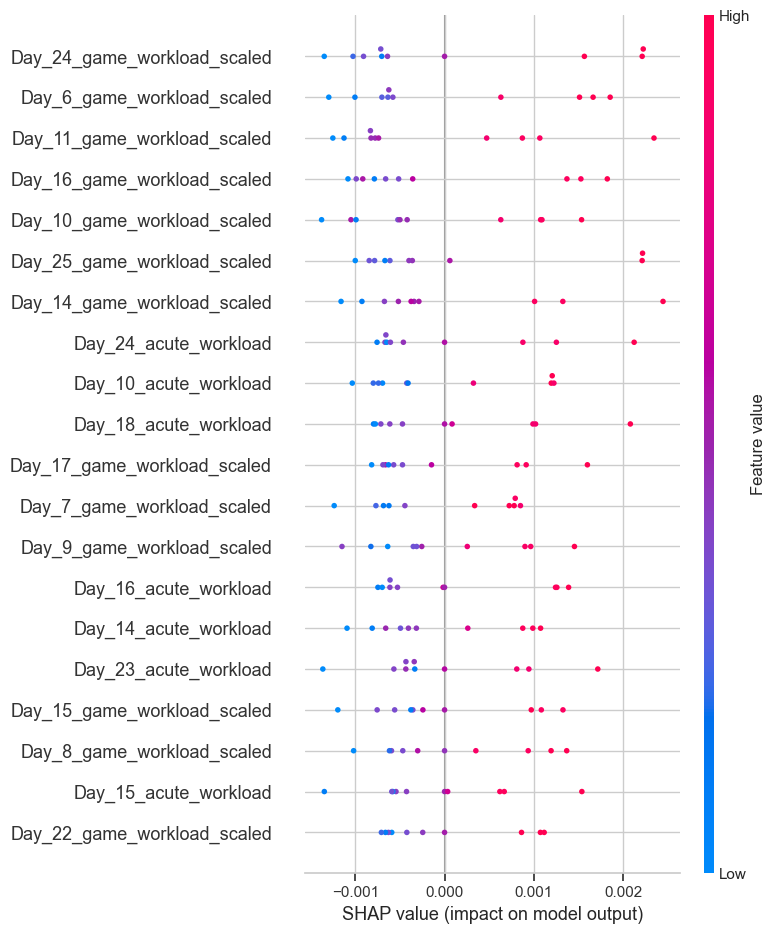

Most Important Feature: Day_24_game_workload_scaled (Importance: 0.0011)
🚀 Training model for Athlete 21...
ADASYN failed for Athlete 21, falling back to RandomOverSampler: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 4, n_samples = 4
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.5434 - accuracy: 0.4998 - loss: 0.7562
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6068 - accuracy: 0.5433 - loss: 0.6693 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7202 - accuracy: 0.6402 - loss: 0.6071 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8832 - accuracy: 0.7927 - loss: 0.4690 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8904 - accuracy: 0.8144 - loss: 0.4679 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9208 - accuracy: 0.8357 - loss: 0.4051 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9222 - accuracy: 0.8518 - loss: 0.3965
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 946us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 929us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 923us/step


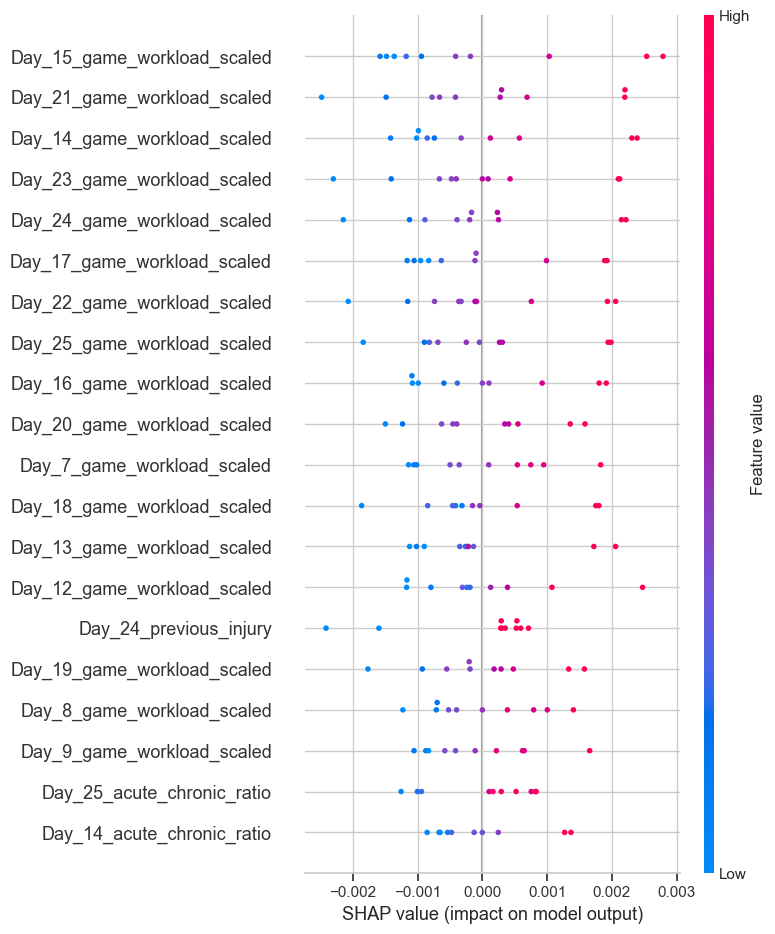

Most Important Feature: Day_15_game_workload_scaled (Importance: 0.0013)
🚀 Training model for Athlete 22...
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.3330 - accuracy: 0.4630 - loss: 0.9523
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.5920 - accuracy: 0.5841 - loss: 0.7111 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7373 - accuracy: 0.6816 - loss: 0.6088 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8290 - accuracy: 0.7986 - loss: 0.5292 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8494 - accuracy: 0.7366 - loss: 0.5056 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8570 - accuracy: 0.7495 - loss: 0.4916 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8797 - accuracy: 0.8174 - loss: 0.4790 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9380 - accuracy: 0.8798 - loss: 0.4069 
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9301 - accuracy: 0.8589 - loss: 0.3951 
Epoch 10/10
5/5 ━━━━

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
758/758 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
758/758 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
758/758 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
758/758 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
758/758 ━━━━━━━━━━━━━━━━━━━━ 1s 941us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
758/758 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
758/758 ━━━━━━━━━━━━━━━━━━━━ 1s 898us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
758/758 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
758/758 ━━━━━━━━━━━━━━━━━━━━ 1s 991us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
758/758 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step


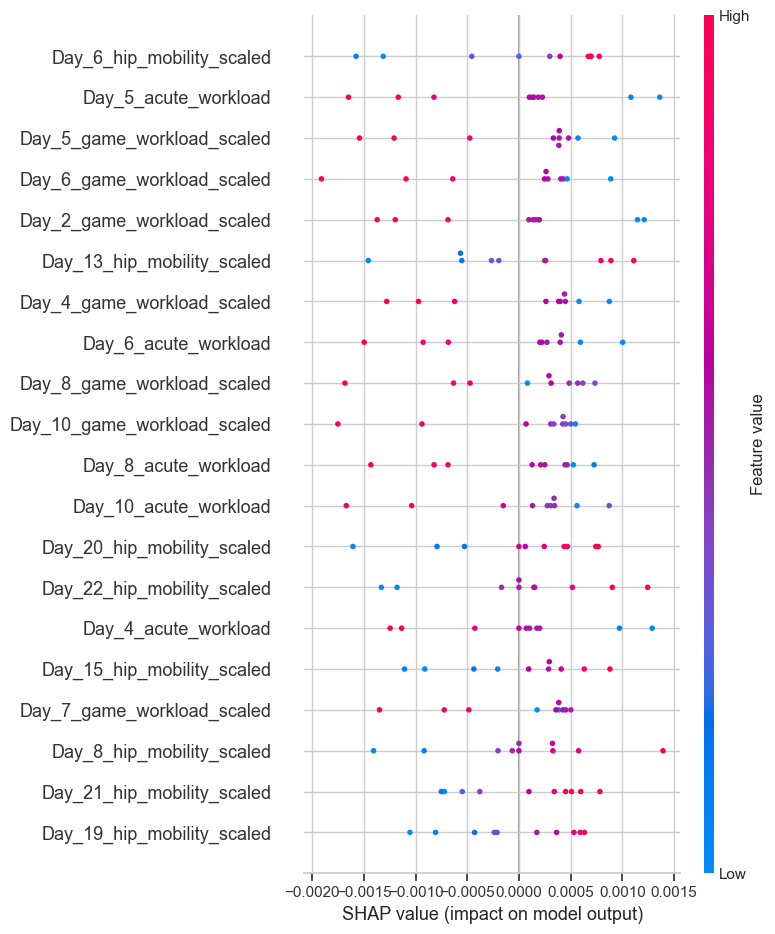

Most Important Feature: Day_6_hip_mobility_scaled (Importance: 0.0007)
🚀 Training model for Athlete 23...
ADASYN failed for Athlete 23, falling back to RandomOverSampler: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 3, n_samples = 3
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - AUC: 0.7308 - accuracy: 0.7009 - loss: 0.5824
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8915 - accuracy: 0.8017 - loss: 0.4202 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9451 - accuracy: 0.8870 - loss: 0.3282 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9533 - accuracy: 0.9187 - loss: 0.2344 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9546 - accuracy: 0.8792 - loss: 0.2781 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9875 - accuracy: 0.9412 - loss: 0.1710 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9768 - accuracy: 0.9034 - loss: 0.2174 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 961us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 960us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 981us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 969us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 920us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step


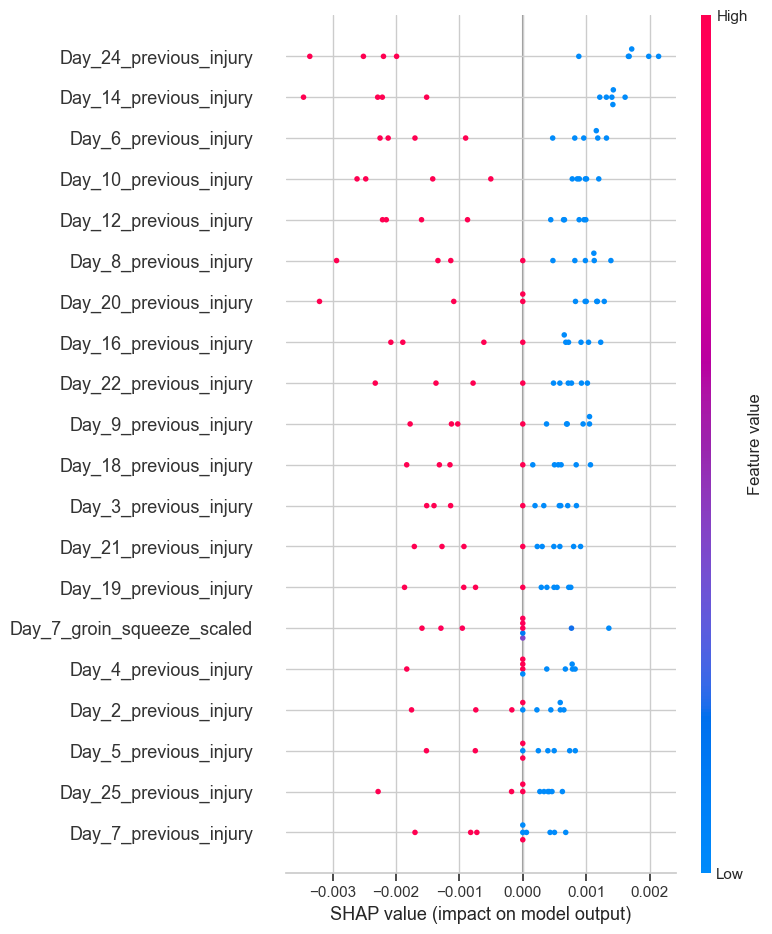

Most Important Feature: Day_24_previous_injury (Importance: 0.0020)
🚀 Training model for Athlete 24...
ADASYN failed for Athlete 24, falling back to RandomOverSampler: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 5, n_samples = 5
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.5643 - accuracy: 0.5248 - loss: 0.8826
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6820 - accuracy: 0.5682 - loss: 0.6831 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7984 - accuracy: 0.6960 - loss: 0.5601 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9065 - accuracy: 0.7731 - loss: 0.4916 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9280 - accuracy: 0.8363 - loss: 0.4338 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9224 - accuracy: 0.8802 - loss: 0.4270 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9638 - accuracy: 0.9051 - loss: 0.3737 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9632

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
768/768 ━━━━━━━━━━━━━━━━━━━━ 1s 936us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
768/768 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
768/768 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
768/768 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
768/768 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
768/768 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
768/768 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
768/768 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
768/768 ━━━━━━━━━━━━━━━━━━━━ 1s 939us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
768/768 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step


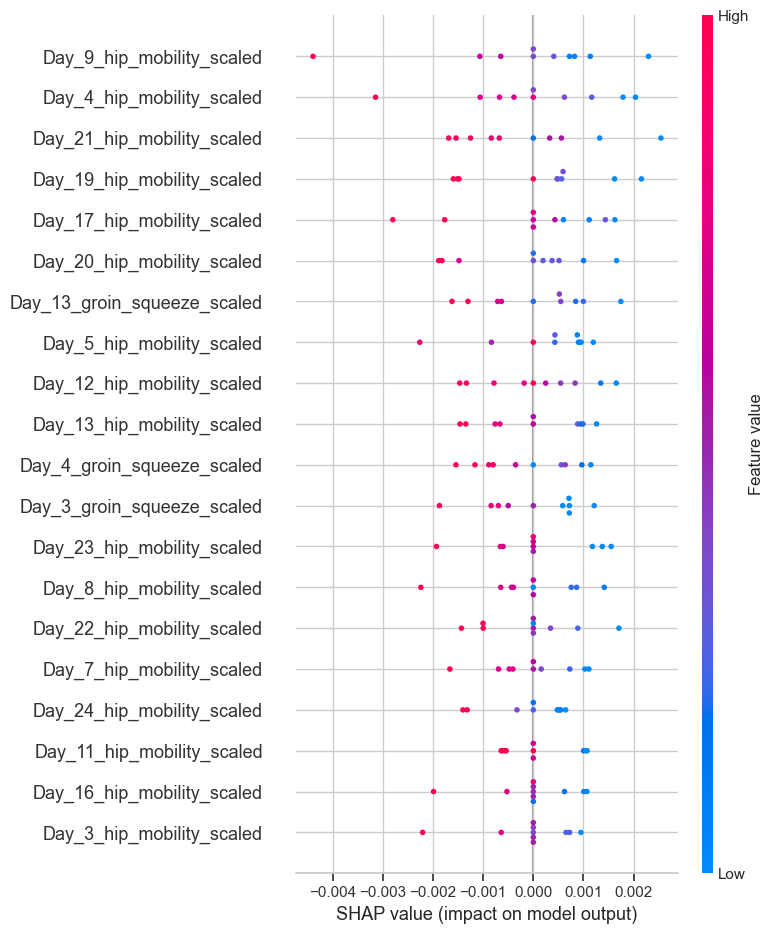

Most Important Feature: Day_9_hip_mobility_scaled (Importance: 0.0011)
🚀 Training model for Athlete 25...
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.4924 - accuracy: 0.5165 - loss: 0.7302
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.6392 - accuracy: 0.5828 - loss: 0.6807 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.7185 - accuracy: 0.6467 - loss: 0.6380 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8469 - accuracy: 0.7452 - loss: 0.5330 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8585 - accuracy: 0.7254 - loss: 0.5144 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9154 - accuracy: 0.8464 - loss: 0.4494
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9085 - accuracy: 0.8074 - loss: 0.4697 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9061 - accuracy: 0.8516 - loss: 0.4415 
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9088 - accuracy: 0.8274 - loss: 0.4244 
Epoch 10/10
5/5 ━━━━━━━

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 903us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 931us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step


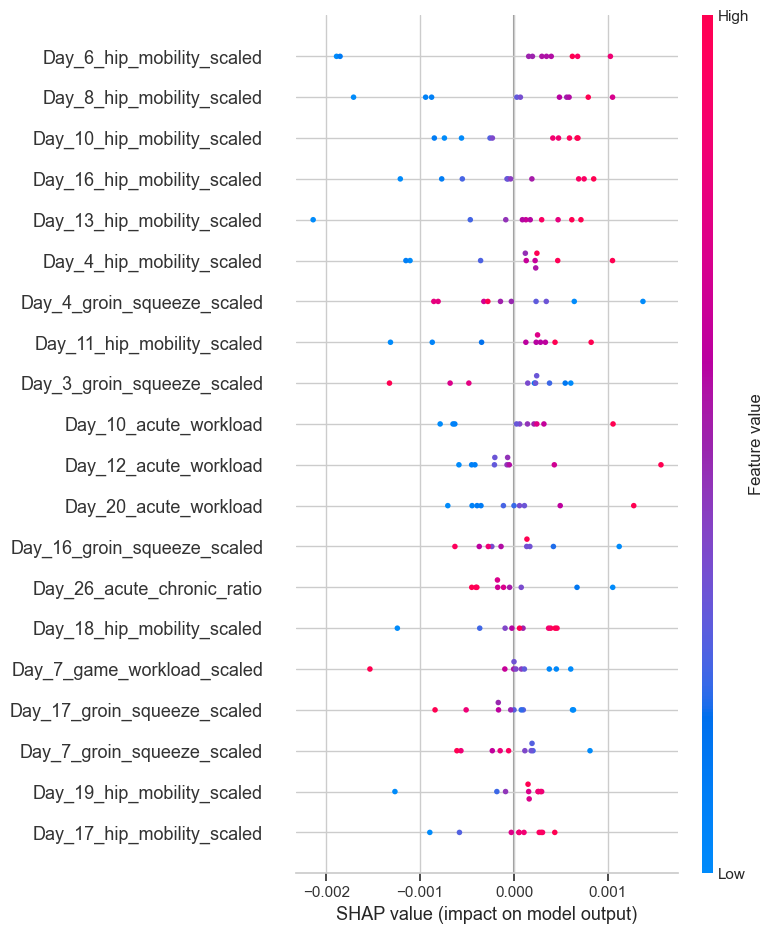

Most Important Feature: Day_6_hip_mobility_scaled (Importance: 0.0007)
🚀 Training model for Athlete 26...
ADASYN failed for Athlete 26, falling back to RandomOverSampler: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 2, n_samples = 2
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.6164 - accuracy: 0.5502 - loss: 0.7533
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8888 - accuracy: 0.8552 - loss: 0.4479 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8914 - accuracy: 0.8587 - loss: 0.3841 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9720 - accuracy: 0.9305 - loss: 0.2361 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9701 - accuracy: 0.9235 - loss: 0.2352
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9657 - accuracy: 0.9538 - loss: 0.2145 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9767 - accuracy: 0.9360 - loss: 0.1829 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.99

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 967us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 943us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
772/772 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step


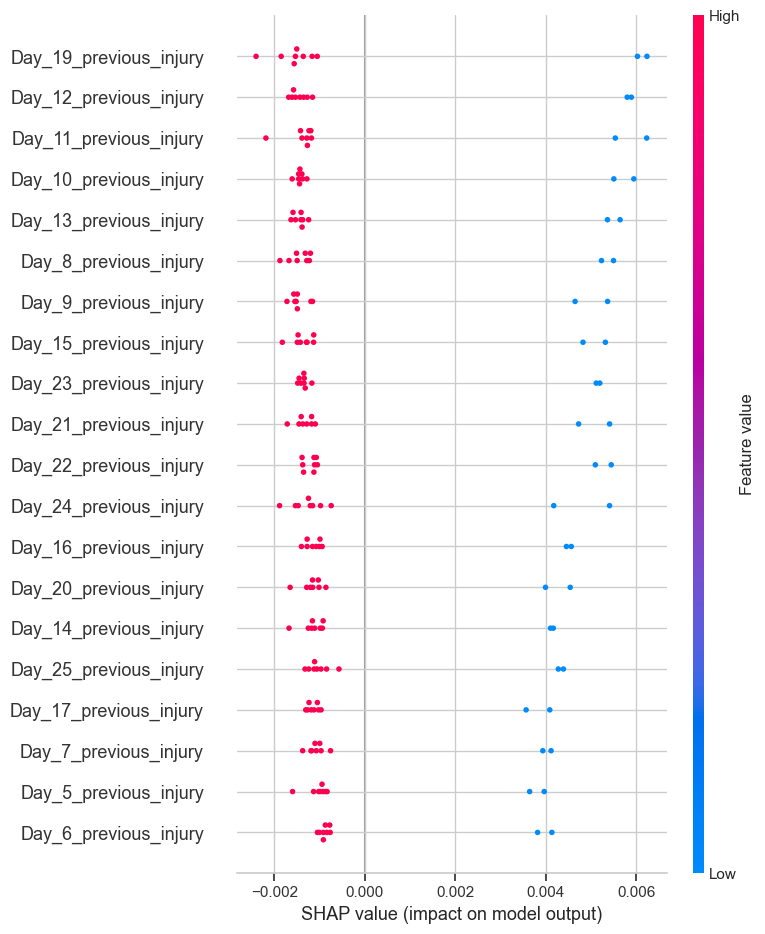

Most Important Feature: Day_19_previous_injury (Importance: 0.0025)
🚀 Training model for Athlete 27...
ADASYN failed for Athlete 27, falling back to RandomOverSampler: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 3, n_samples = 3
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.4485 - accuracy: 0.4706 - loss: 0.8278
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8807 - accuracy: 0.8256 - loss: 0.4648 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9547 - accuracy: 0.8832 - loss: 0.3260 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9666 - accuracy: 0.8766 - loss: 0.2877 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9818 - accuracy: 0.9554 - loss: 0.2228
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9651 - accuracy: 0.9511 - loss: 0.2303 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9898 - accuracy: 0.9628 - loss: 0.1668 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9880 

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
770/770 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
770/770 ━━━━━━━━━━━━━━━━━━━━ 1s 980us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
770/770 ━━━━━━━━━━━━━━━━━━━━ 1s 990us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
770/770 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
770/770 ━━━━━━━━━━━━━━━━━━━━ 1s 930us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
770/770 ━━━━━━━━━━━━━━━━━━━━ 1s 896us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
770/770 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
770/770 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
770/770 ━━━━━━━━━━━━━━━━━━━━ 1s 973us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
770/770 ━━━━━━━━━━━━━━━━━━━━ 1s 937us/step


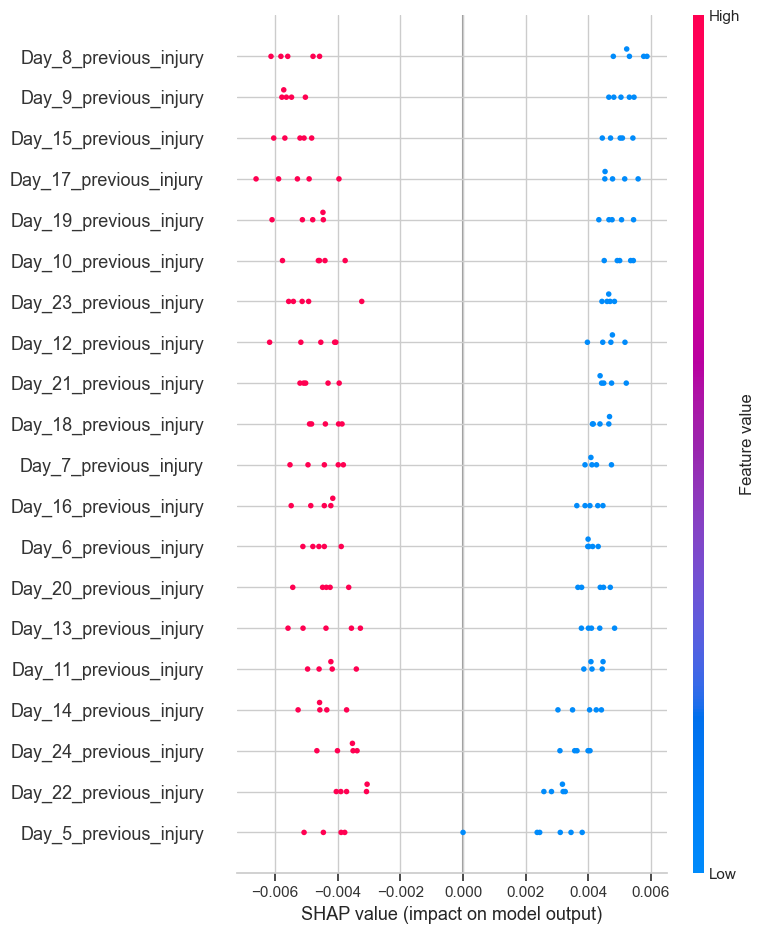

Most Important Feature: Day_8_previous_injury (Importance: 0.0054)
🚀 Training model for Athlete 28...
ADASYN failed for Athlete 28, falling back to RandomOverSampler: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 3, n_samples = 3
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.5772 - accuracy: 0.5434 - loss: 0.7737
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8287 - accuracy: 0.7190 - loss: 0.5033 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9154 - accuracy: 0.8559 - loss: 0.3977 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9569 - accuracy: 0.9101 - loss: 0.3205 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9618 - accuracy: 0.8675 - loss: 0.3277 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9891 - accuracy: 0.9152 - loss: 0.2620 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9968 - accuracy: 0.9286 - loss: 0.2481 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9825 

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
759/759 ━━━━━━━━━━━━━━━━━━━━ 1s 949us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
759/759 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
759/759 ━━━━━━━━━━━━━━━━━━━━ 1s 909us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
759/759 ━━━━━━━━━━━━━━━━━━━━ 1s 962us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
759/759 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
759/759 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
759/759 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
759/759 ━━━━━━━━━━━━━━━━━━━━ 1s 901us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
759/759 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
759/759 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step


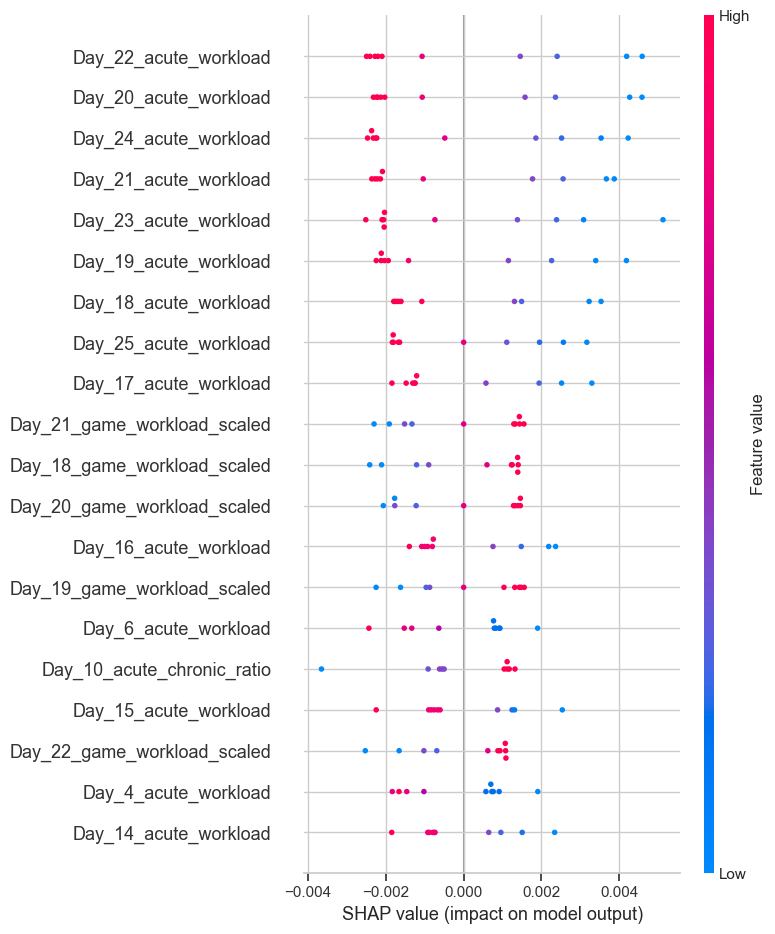

Most Important Feature: Day_22_acute_workload (Importance: 0.0025)
🚀 Training model for Athlete 29...
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.4799 - accuracy: 0.4572 - loss: 1.0101
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.7327 - accuracy: 0.6729 - loss: 0.6614 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.8202 - accuracy: 0.7567 - loss: 0.5186 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8867 - accuracy: 0.7974 - loss: 0.4353 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8872 - accuracy: 0.8351 - loss: 0.4283 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9478 - accuracy: 0.8439 - loss: 0.3132 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.9618 - accuracy: 0.8968 - loss: 0.2853 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9596 - accuracy: 0.9044 - loss: 0.3096 
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9711 - accuracy: 0.9136 - loss: 0.2593 
Epoch 10/10
5/5 ━━━━━━━━━━

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
757/757 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
757/757 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
757/757 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
757/757 ━━━━━━━━━━━━━━━━━━━━ 1s 911us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
757/757 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
757/757 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
757/757 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
757/757 ━━━━━━━━━━━━━━━━━━━━ 1s 919us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
757/757 ━━━━━━━━━━━━━━━━━━━━ 1s 976us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
757/757 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step


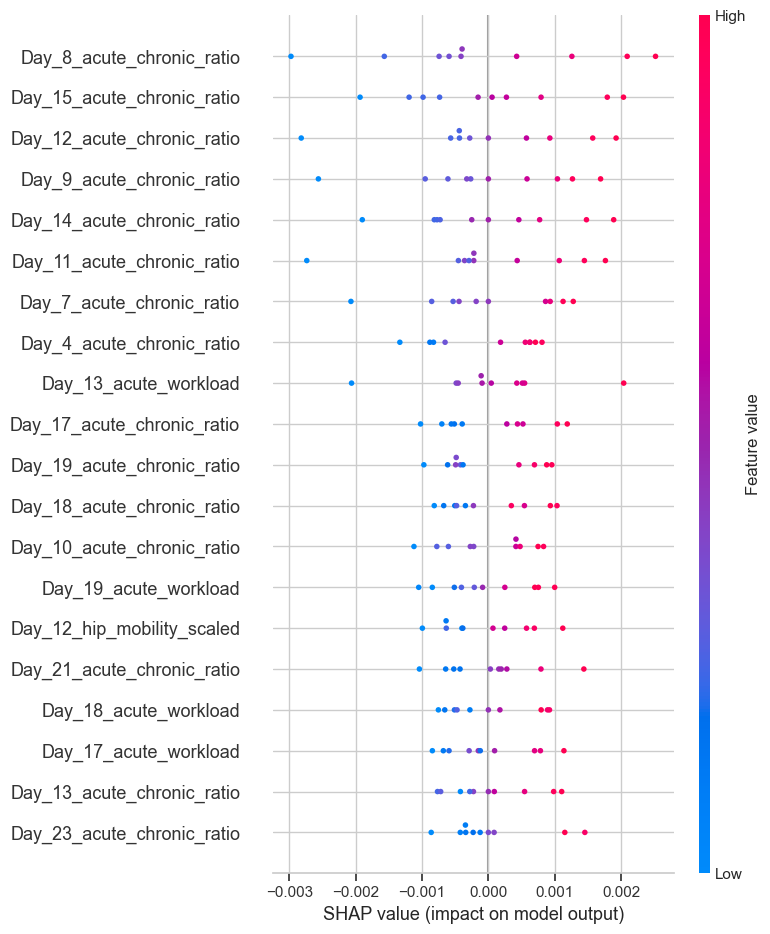

Most Important Feature: Day_8_acute_chronic_ratio (Importance: 0.0013)
🚀 Training model for Athlete 30...
ADASYN failed for Athlete 30, falling back to RandomOverSampler: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 2, n_samples = 2
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - AUC: 0.5134 - accuracy: 0.6056 - loss: 0.7931
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - AUC: 0.8877 - accuracy: 0.8052 - loss: 0.4815 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9201 - accuracy: 0.8492 - loss: 0.3901 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9912 - accuracy: 0.9332 - loss: 0.2638 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9953 - accuracy: 0.8946 - loss: 0.2464 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9976 - accuracy: 0.9659 - loss: 0.1936 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9985 - accuracy: 0.9793 - loss: 0.1684 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - AUC: 0.9

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 900us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 906us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 905us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 910us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 935us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
753/753 ━━━━━━━━━━━━━━━━━━━━ 1s 908us/step


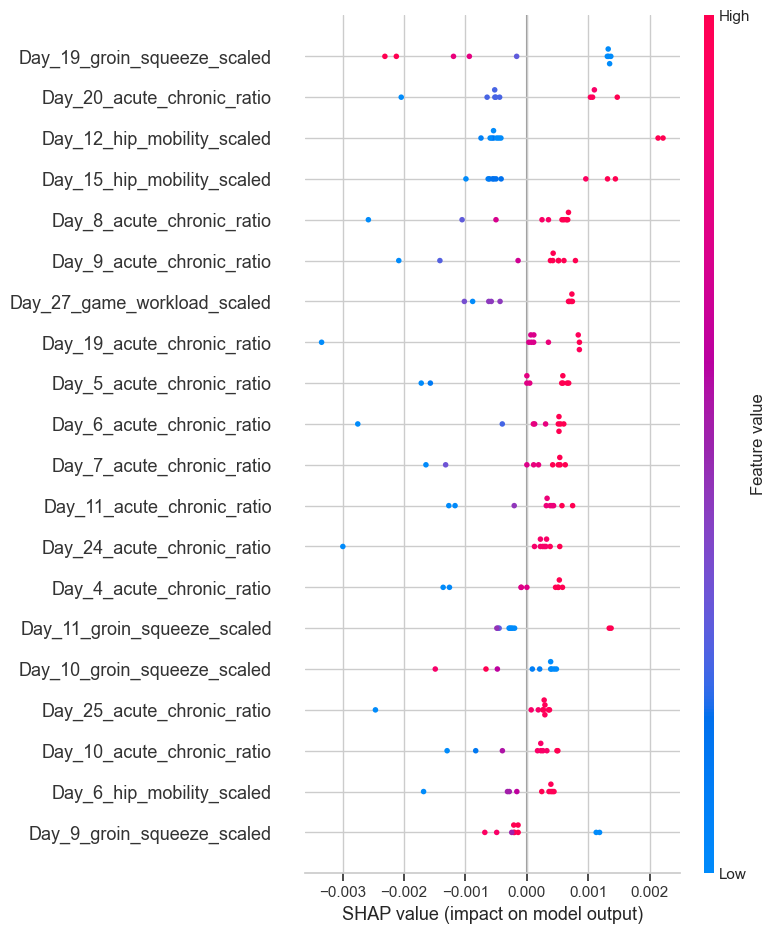

Most Important Feature: Day_19_groin_squeeze_scaled (Importance: 0.0013)
Saving Top Features for Each Athlete...


In [41]:
model = AthleteCNNModel(df, CONFIG)
model.process_data()
model.train()
model.save_top_features()

## Plot best features

In [3]:

fts = pd.read_csv('top_features_per_athlete.csv')

fts['feature'] = fts['feature'].str.replace(r"Day_\d+_", "", regex=True)

fts.head()

athlete_id               feature  importance
0           1  groin_squeeze_scaled    0.000990
1           2  groin_squeeze_scaled    0.001479
2           3  game_workload_scaled    0.000662
3           4       previous_injury    0.001429
4           6  game_workload_scaled    0.001759

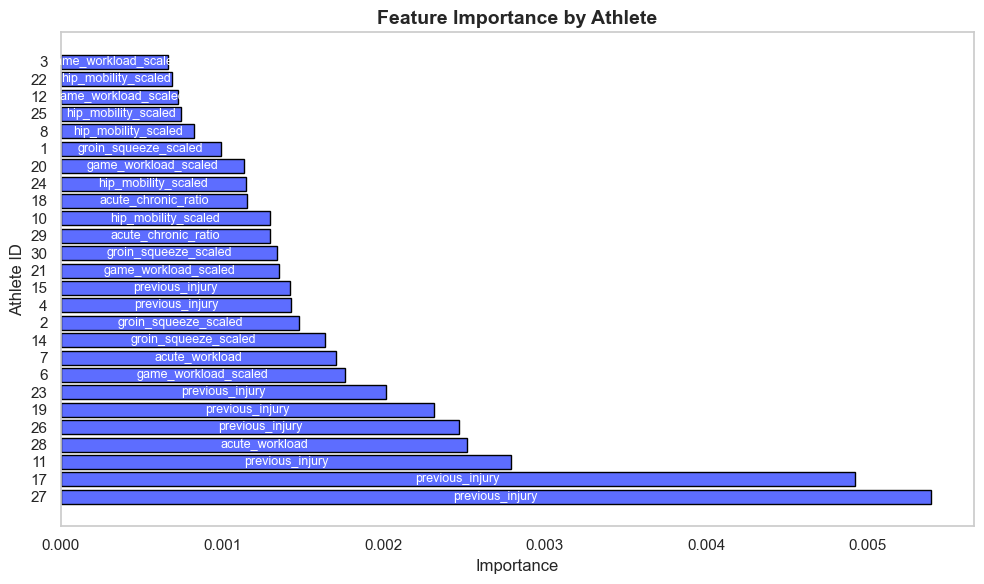

In [5]:
fts = fts.sort_values(by='importance', ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
fts['athlete_id'] = fts['athlete_id'].astype(str)


bars = plt.barh(
    y=fts['athlete_id'], 
    width=fts['importance'], 
    color='#5d6dff', 
    edgecolor='black'
)
for bar, feature, importance in zip(bars, fts['feature'], fts['importance']):
    plt.text(
        bar.get_width() / 2, 
        bar.get_y() + bar.get_height() / 2, 
        feature,
        ha='center', 
        va='center', 
        fontsize=9, 
        color='#ffffff' 
    )

plt.title("Feature Importance by Athlete", fontsize=14, weight='bold')
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Athlete ID", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.grid(False)
plt.show()